<a href="https://colab.research.google.com/github/YasirHabib/tensorflow/blob/master/fashion_mnist_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf

In [0]:
class HiddenLayers():
  def __init__(self, D, M):
    self.D = D
    self.M = M
    
    W = np.random.randn(D, M) / np.sqrt(D)
    b = np.random.randn(M)
    
    self.W = tf.Variable(W.astype(np.float32))
    self.b = tf.Variable(b.astype(np.float32))
    
    self.params = [self.W, self.b]
    
  def HiddenLayers_forward(self, X):
    return tf.nn.relu(tf.matmul(X, self.W)+self.b)

In [0]:
class FinalLayers():
  def __init__(self, M, K):
    self.M = M
    self.K = K
    
    W = np.random.randn(M, K) / np.sqrt(M)
    b = np.random.randn(K)
    
    self.W = tf.Variable(W.astype(np.float32))
    self.b = tf.Variable(b.astype(np.float32))
    
    self.params = [self.W, self.b]
    
  def FinalLayers_forward(self, Z):
    return tf.matmul(Z, self.W)+self.b

In [0]:
class ANN():
  def __init__(self, size):
    self.size = size
    
  def set_session(self, session):
    self.session = session
    
  def fit(self, Xtrain, Ytrain, Xtest, Ytest, lr=10e-6, reg=0.1, training_epochs=10, batch_sz=500):
    
    Xtrain = Xtrain.astype(np.float32)
    Ytrain = Ytrain.astype(np.int32)
    
    Xtest = Xtest.astype(np.float32)
    Ytest = Ytest.astype(np.int32)
        
    N,D = Xtrain.shape
    K = len(set(Ytrain))
    
    self.layers=[]
    h = HiddenLayers(D, self.size)
    self.layers.append(h)
    
    f = FinalLayers(self.size, K)
    self.layers.append(f)
    
    self.parameters = []
    for obj in self.layers:
      self.parameters += obj.params
      
    X = tf.placeholder(tf.float32, shape=(None, D), name='X')
    Y = tf.placeholder(tf.int32, shape=(None,), name='Y')
    logits = self.tf_forward(X)
    
    rcost = reg*sum([tf.nn.l2_loss(p) for p in self.parameters])
    cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=Y)) + rcost
    
    train_op = tf.train.MomentumOptimizer(lr, momentum=0.9, use_nesterov=True).minimize(cost)
    
    prediction = tf.argmax(logits, 1)
    
    self.session.run(tf.global_variables_initializer())
    
    n_batches = N // batch_sz
    costs = []
    
    for epoch in range(training_epochs):
      for j in range(n_batches):
        Xbatch = Xtrain[j*batch_sz:(j*batch_sz + batch_sz)]
        Ybatch = Ytrain[j*batch_sz:(j*batch_sz + batch_sz)]
        
        self.session.run(train_op, feed_dict={X:Xbatch, Y:Ybatch})
        
        if j % 1 == 0:
          c, p = self.session.run([cost, prediction], feed_dict={X:Xtest, Y:Ytest})
          costs.append(c)
          e = np.mean(p != Ytest)
          print("Epoch", (epoch + 1), ": cost =", c, "error rate =", e)
          
    plt.plot(costs, label="cost")
    plt.legend()
    plt.show()
        
  def tf_forward(self, X):
    for obj in self.layers[:-1]:
      Z = obj.HiddenLayers_forward(X)
    for obj in self.layers[-1:]:
      logits = obj.FinalLayers_forward(Z)
    return logits

In [0]:
def main():
  from google.colab import drive
  drive.mount('/content/gdrive')
  
  df_train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_train.csv')
  df_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_test.csv')
  
  data_train = df_train.values
  data_test = df_test.values
  
  Xtrain = data_train[:,1:]
  Ytrain = data_train[:,0]
  
  Xtest = data_test[:,1:]
  Ytest = data_test[:,0]
  
  model = ANN(128)
  session = tf.InteractiveSession()
  model.set_session(session)
  model.fit(Xtrain, Ytrain, Xtest, Ytest)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch 1 : cost = 134.13104 error rate = 0.9569
Epoch 1 : cost = 99.58721 error rate = 0.9109
Epoch 1 : cost = 82.58449 error rate = 0.8592
Epoch 1 : cost = 77.57402 error rate = 0.8381
Epoch 1 : cost = 72.682274 error rate = 0.8298
Epoch 1 : cost = 65.23942 error rate = 0.8248
Epoch 1 : cost = 59.29351 error rate = 0.8146
Epoch 1 : cost = 55.355 error rate = 0.7908
Epoch 1 : cost = 51.58831 error rate = 0.7668
Epoch 1 : cost = 47.362484 error rate = 0.7488
Epoch 1 : cost = 43.319023 error rate = 0.7311
Epoch 1 : cost = 41.410328 error rate = 0.7019
Epoch 1 : cost = 40.921917 error rate = 0.6814
Epoch 1 : cost = 39.472008 error rate = 0.6652
Epoch 1 : cost = 37.51729 error rate = 0.6464
Epoch 1 : cost = 35.245693 error rate = 0.6272
Epoch 1 : cost = 33.068268 error rate = 0.6095
Epoch 1 : cost = 31.224464 error rate = 0.5995
Epoch 1 : cost = 29.800617 error rate = 0.5893
Epoch 1 : cost = 28.38613 error rate = 0.5726
Epoch 1 : cost = 27.120937 error rate = 0.5455
Epoch 1 : cost = 26.1968

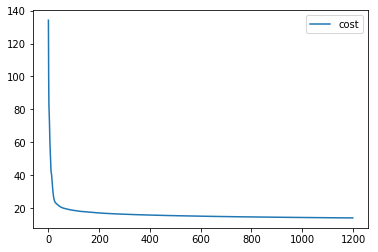

In [218]:
if __name__ == '__main__':
  main()